This project focuses on global blood donation efforts, aiming to optimize blood distribution strategies worldwide. It analyzes global trends in blood type distributions to identify shortages and regional disparities, working to optimize blood donation drives by pinpointing areas with critical blood type needs. By enhancing emergency preparedness and ensuring an adequate blood supply in critical regions, the project contributes to improving healthcare systems through data-driven blood donation strategies and policies.

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [25]:
df_By_Country = pd.read_csv("blood_type_distribution_by_country.csv" ,encoding="ISO-8859-1")
df_By_Country.head()

,Country/Dependency,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
0,Albania[2],"3,074,579",34.10%,31.20%,14.50%,5.20%,6.00%,5.50%,2.60%,0.90%
1,Algeria[3],"43,576,691",40.00%,30.00%,15.00%,4.25%,6.60%,2.30%,1.10%,0.75%
2,Argentina[4],"45,479,118",50.34%,31.09%,8.20%,2.16%,4.29%,2.98%,0.74%,0.20%
3,Armenia[5],"3,021,324",29.00%,46.30%,12.00%,5.60%,2.00%,3.70%,1.00%,0.40%
4,Australia[6],"25,466,459",38.00%,32.00%,12.00%,4.00%,7.00%,6.00%,2.00%,1.00%


# Data cleaning: Trasformation & Refinement

The dataset underwent a meticulous transformation process to ensure it is primed for analysis. Irrelevant footnotes and formatting inconsistencies were scrubbed from the `Country/Dependency` column, while population values were seamlessly converted into numerical formats for precise calculations. Blood type percentages were refined, with extraneous symbols discarded and values restructured into their decimal forms for analytical clarity. Any gaps in the data were swiftly addressed, ensuring a complete and robust dataset for the next phase of exploration.
The data is now pristine, ready to reveal insights with confidence.


In [26]:
df_By_Country.rename(columns={df_By_Country.columns[0]: "Country"}, inplace=True)
df_By_Country["Country"] = df_By_Country["Country"].str.strip().str.replace(r"\[.*\]", "", regex=True)

df_By_Country["Population"] = df_By_Country["Population"].str.replace(",", "", regex=True).astype(float)

percentage_columns = ["O+", "A+", "B+", "AB+", "O-", "A-", "B-", "AB-"]
for col in percentage_columns:
    df_By_Country[col] = df_By_Country[col].str.replace("%", "", regex=True)  
    df_By_Country[col] = pd.to_numeric(df_By_Country[col], errors="coerce") / 100 

df_By_Country.set_index("Country", inplace=True)

print(df_By_Country.head())


           Population      O+      A+     B+     AB+      O-      A-      B-  \
Country                                                                        
Albania     3074579.0  0.3410  0.3120  0.145  0.0520  0.0600  0.0550  0.0260   
Algeria    43576691.0  0.4000  0.3000  0.150  0.0425  0.0660  0.0230  0.0110   
Argentina  45479118.0  0.5034  0.3109  0.082  0.0216  0.0429  0.0298  0.0074   
Armenia     3021324.0  0.2900  0.4630  0.120  0.0560  0.0200  0.0370  0.0100   
Australia  25466459.0  0.3800  0.3200  0.120  0.0400  0.0700  0.0600  0.0200   

              AB-  
Country            
Albania    0.0090  
Algeria    0.0075  
Argentina  0.0020  
Armenia    0.0040  
Australia  0.0100  


# 1.What is the average distribution of blood types across all countries?


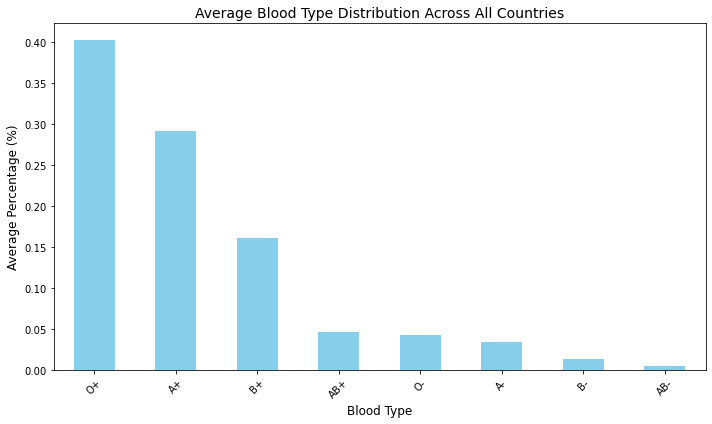

In [27]:
df_By_Country.columns = df_By_Country.columns.str.strip()

percentage_columns = ["O+", "A+", "B+", "AB+", "O-", "A-", "B-", "AB-"]

for col in percentage_columns:
    df_By_Country[col] = df_By_Country[col].astype(str).str.replace("%", "", regex=True).astype(float)

average_blood_distribution = df_By_Country[percentage_columns].mean()

plt.figure(figsize=(10, 6))
average_blood_distribution.plot(kind='bar', color='skyblue')
plt.title('Average Blood Type Distribution Across All Countries', fontsize=14)
plt.xlabel('Blood Type', fontsize=12)
plt.ylabel('Average Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show() 


# 2.Which blood type has the highest average percentage across all countries in the dataset?

The blood type with the highest average percentage across all countries is O+ with an average of 0.40%.


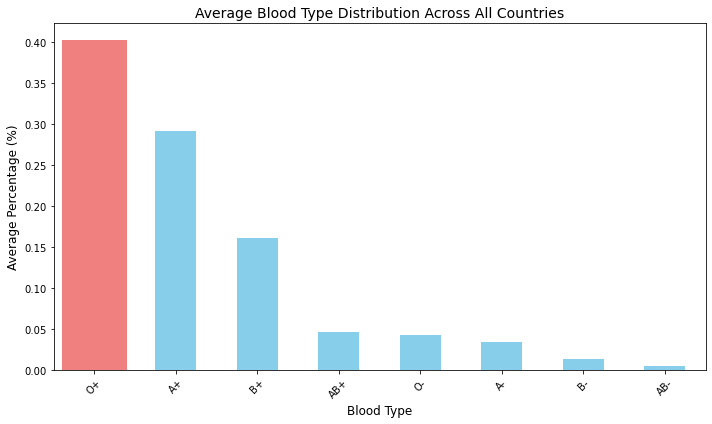

In [28]:

df_By_Country.columns = df_By_Country.columns.str.strip()

percentage_columns = ["O+", "A+", "B+", "AB+", "O-", "A-", "B-", "AB-"]

for col in percentage_columns:
    df_By_Country[col] = df_By_Country[col].astype(str).str.replace("%", "", regex=True).astype(float)

average_blood_distribution = df_By_Country[percentage_columns].mean()

max_blood_type = average_blood_distribution.idxmax()
max_percentage = average_blood_distribution.max()

print(f"The blood type with the highest average percentage across all countries is {max_blood_type} with an average of {max_percentage:.2f}%.")

plt.figure(figsize=(10, 6))
average_blood_distribution.plot(kind='bar', color='skyblue')

plt.bar(max_blood_type, max_percentage, color='lightcoral')

plt.title('Average Blood Type Distribution Across All Countries', fontsize=14)
plt.xlabel('Blood Type', fontsize=12)
plt.ylabel('Average Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# 3.How does the blood type distribution vary between countries with high vs. low populations?

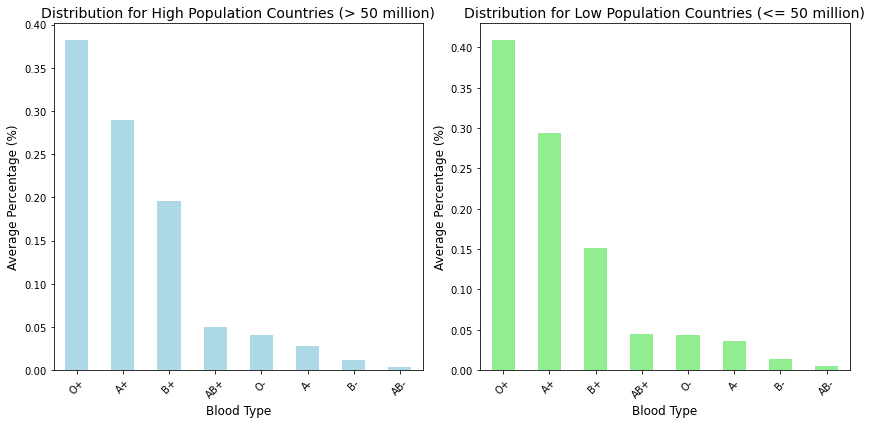

In [29]:
df_By_Country.columns = df_By_Country.columns.str.strip()

df_By_Country['Population'] = df_By_Country['Population'].apply(lambda x: int(str(x).replace(',', '').replace(' ', '').split('.')[0]))

percentage_columns = ["O+", "A+", "B+", "AB+", "O-", "A-", "B-", "AB-"]
for col in percentage_columns:
    df_By_Country[col] = df_By_Country[col].astype(str).str.replace("%", "", regex=True).astype(float)

df_high_population = df_By_Country[df_By_Country['Population'] > 50000000]
df_low_population = df_By_Country[df_By_Country['Population'] <= 50000000]

average_high_population = df_high_population[percentage_columns].mean()
average_low_population = df_low_population[percentage_columns].mean()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
average_high_population.plot(kind='bar', color='lightblue')
plt.title('Distribution for High Population Countries (> 50 million)', fontsize=14)
plt.xlabel('Blood Type', fontsize=12)
plt.ylabel('Average Percentage (%)', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
average_low_population.plot(kind='bar', color='lightgreen')
plt.title('Distribution for Low Population Countries (<= 50 million)', fontsize=14)
plt.xlabel('Blood Type', fontsize=12)
plt.ylabel('Average Percentage (%)', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# 4.Which country has the most dominant single blood type, and what percentage of the population has that type?

The country with the most dominant single blood type is Ecuador, where O+ is present in 75.00% of the population.


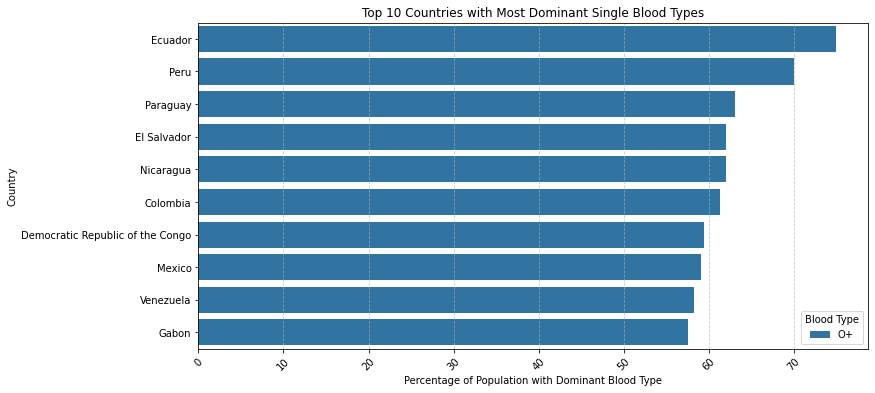

In [30]:


df_By_Country["Dominant_Blood_Type"] = df_By_Country[percentage_columns].idxmax(axis=1)
df_By_Country["Dominant_Percentage"] = df_By_Country[percentage_columns].max(axis=1) * 100  

most_dominant_country = df_By_Country.loc[df_By_Country["Dominant_Percentage"].idxmax()]

print(f"The country with the most dominant single blood type is {most_dominant_country.name}, "
      f"where {most_dominant_country['Dominant_Blood_Type']} is present in "
      f"{most_dominant_country['Dominant_Percentage']:.2f}% of the population.")

top_10_dominant = df_By_Country.nlargest(10, "Dominant_Percentage")

plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_10_dominant["Dominant_Percentage"],
    y=top_10_dominant.index,
    hue=top_10_dominant["Dominant_Blood_Type"],
    palette="tab10"
)
plt.xlabel("Percentage of Population with Dominant Blood Type")
plt.ylabel("Country")
plt.title("Top 10 Countries with Most Dominant Single Blood Types")
plt.legend(title="Blood Type")
plt.xticks(rotation=45)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


# 5.Which regions are at the highest risk of blood shortages based on rare blood type distributions?



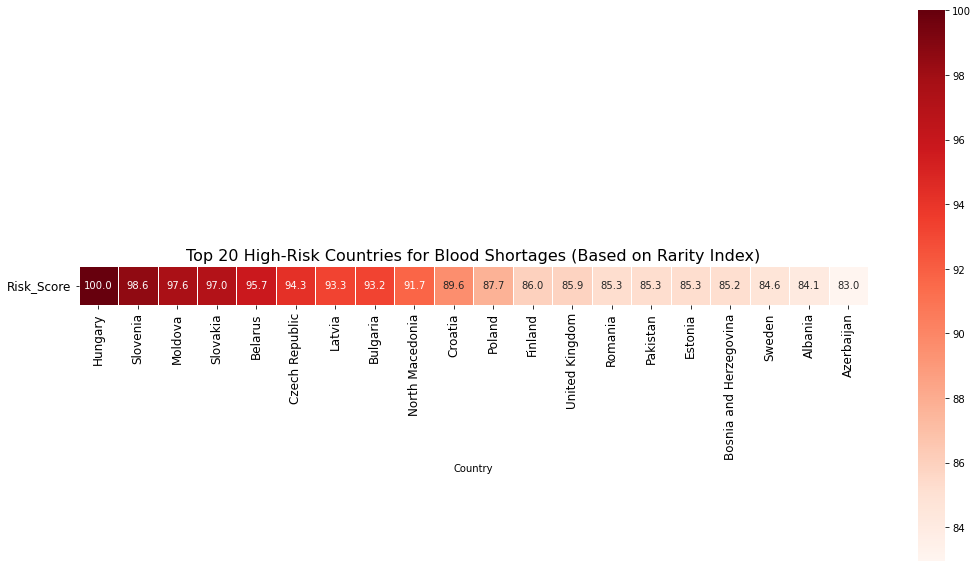

In [31]:
global_averages = df_By_Country[percentage_columns].mean()
rarity_scores = 1 / global_averages 

df_By_Country["Rarity_Index"] = (df_By_Country[percentage_columns] * rarity_scores).sum(axis=1)

df_By_Country["Risk_Score"] = (df_By_Country["Rarity_Index"] - df_By_Country["Rarity_Index"].min()) / \
                              (df_By_Country["Rarity_Index"].max() - df_By_Country["Rarity_Index"].min()) * 100

df_sorted = df_By_Country[["Risk_Score"]].sort_values(by="Risk_Score", ascending=False).head(20)

plt.figure(figsize=(15, 8)) 
sns.heatmap(df_sorted.T, cmap="Reds", annot=True, fmt=".1f", linewidths=1, cbar=True, square=True)

plt.title("Top 20 High-Risk Countries for Blood Shortages (Based on Rarity Index)", fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()  

plt.show()


#6. Which countries have the most balanced blood type distributions (least variation among blood types)?

Top 10 countries with most balanced blood type distributions:
                Blood_Type_SD
Country                      
Hungary              0.117838
Moldova              0.119729
Latvia               0.122330
Belarus              0.124233
Estonia              0.124535
Poland               0.124556
Slovenia             0.124671
Azerbaijan           0.124983
Slovakia             0.126272
Czech Republic       0.126491


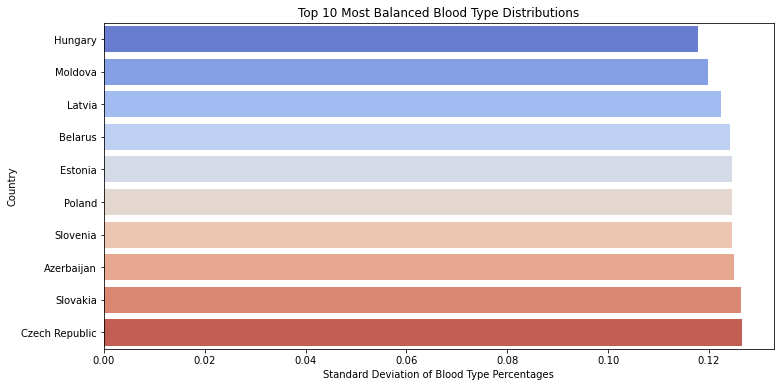

In [32]:
# Calculate standard deviation across blood types for each country
df_By_Country["Blood_Type_SD"] = df_By_Country[percentage_columns].std(axis=1)

# Countries with most balanced distributions (lowest standard deviation)
most_balanced = df_By_Country.nsmallest(10, "Blood_Type_SD")

print("Top 10 countries with most balanced blood type distributions:")
print(most_balanced[["Blood_Type_SD"]])

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(
    x=most_balanced["Blood_Type_SD"],
    y=most_balanced.index,
    palette="coolwarm"
)
plt.xlabel("Standard Deviation of Blood Type Percentages")
plt.ylabel("Country")
plt.title("Top 10 Most Balanced Blood Type Distributions")
plt.show()


# 7. How correlated are different blood types globally

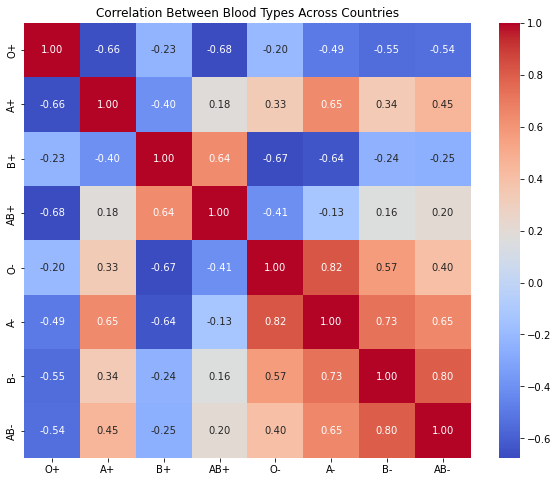

In [33]:
# Compute correlation matrix
blood_correlation = df_By_Country[percentage_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(blood_correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Blood Types Across Countries")
plt.show()


#8. Which countries are extreme outliers in rare blood types (AB- and B-)?

In [34]:
# Use Z-score to find outliers
from scipy.stats import zscore

df_By_Country["AB-_zscore"] = zscore(df_By_Country["AB-"])
df_By_Country["B-_zscore"] = zscore(df_By_Country["B-"])

outliers = df_By_Country[(abs(df_By_Country["AB-_zscore"]) > 2) | (abs(df_By_Country["B-_zscore"]) > 2)]
print("Countries with extreme rare blood type distributions:")
print(outliers[["AB-", "B-"]])


Countries with extreme rare blood type distributions:
Empty DataFrame
Columns: [AB-, B-]
Index: []


#9. Can we cluster countries based on blood type distributions to identify similar blood profiles?

In [35]:
# Fill missing values with column mean
df_By_Country[percentage_columns] = df_By_Country[percentage_columns].fillna(df_By_Country[percentage_columns].mean())

# Confirm there are no more NaNs
print(df_By_Country[percentage_columns].isna().sum())


O+     0
A+     0
B+     0
AB+    0
O-     0
A-     0
B-     0
AB-    0
dtype: int64


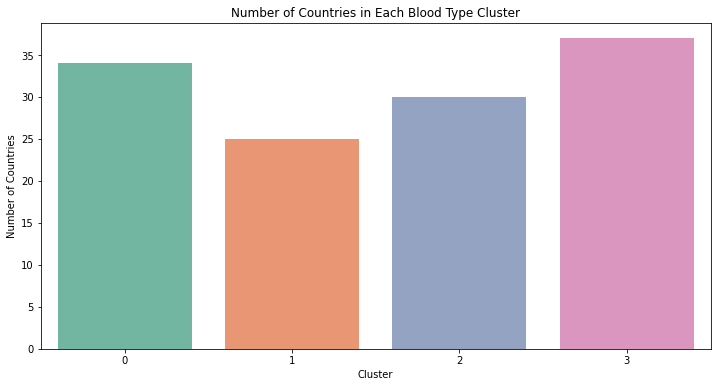

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Ensure numeric
for col in percentage_columns:
    df_By_Country[col] = pd.to_numeric(df_By_Country[col], errors='coerce')

# Scale blood type percentages
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_By_Country[percentage_columns])

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_By_Country["Cluster"] = kmeans.fit_predict(scaled_data)

# Reset index for plotting
df_By_Country_reset = df_By_Country.reset_index()

plt.figure(figsize=(12, 6))
sns.countplot(x="Cluster", data=df_By_Country_reset, palette="Set2")
plt.title("Number of Countries in Each Blood Type Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Countries")
plt.show()


In [37]:
print(df_By_Country[percentage_columns].isna().sum())


O+     0
A+     0
B+     0
AB+    0
O-     0
A-     0
B-     0
AB-    0
dtype: int64


#10. Which countries would benefit the most from importing or exporting blood to balance rare types?

Top 10 countries most in need of rare blood types:
                AB-      B-  Rare_Shortage_Index
Country                                         
Taiwan       0.0001  0.0001               0.9998
Bhutan       0.0001  0.0004               0.9995
South Korea  0.0001  0.0010               0.9989
North Korea  0.0003  0.0010               0.9987
Philippines  0.0003  0.0010               0.9987
Japan        0.0005  0.0010               0.9985
Malaysia     0.0004  0.0014               0.9982
Indonesia    0.0004  0.0015               0.9981
Macao        0.0005  0.0017               0.9978
Vietnam      0.0002  0.0020               0.9978


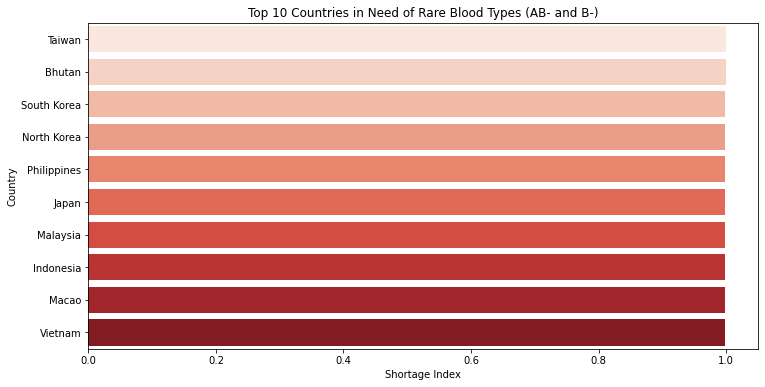

In [38]:
# Calculate deficit/surplus for rare blood types
rare_types = ["AB-", "B-"]
df_By_Country["Rare_Shortage_Index"] = 1 - df_By_Country[rare_types].sum(axis=1)

# Countries needing rare types
highest_need = df_By_Country.nlargest(10, "Rare_Shortage_Index")

print("Top 10 countries most in need of rare blood types:")
print(highest_need[rare_types + ["Rare_Shortage_Index"]])

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(
    x=highest_need["Rare_Shortage_Index"],
    y=highest_need.index,
    palette="Reds"
)
plt.title("Top 10 Countries in Need of Rare Blood Types (AB- and B-)")
plt.xlabel("Shortage Index")
plt.ylabel("Country")
plt.show()
